In [1]:
import pandas as pd
import numpy as np

In [2]:
danawa_data =pd.read_excel('./my_files/danawa_crawling_data_final(desktop_game).xlsx')
danawa_data.head()

,회사명,제품명,용도,그래픽카드,가격(원),성능,우선순위
0,다나와표준PC,전문가용 211125,용도: 게임용,지포스 GTX 1650,1115850,1650,0
1,HP,파빌리온 게이밍 TG01-2004kl,용도: 게임용,지포스 RTX 3060 Ti,1598580,3060,2
2,이엠텍,레드빗 PC PRO - R503,용도: 게임용,지포스 RTX 3060,1496730,3060,0
3,다나와표준PC,게임용 220115,용도: 게임용,지포스 RTX 3060,1798980,3060,0
4,ASRock,DeskMini X300 120W 에즈윈,용도: 게임용,지포스 RTX 3060,203440,3060,0


In [3]:
top_list = danawa_data.sort_values(["성능","우선순위"], ascending=False)
top_list.head()

,회사명,제품명,용도,그래픽카드,가격(원),성능,우선순위
67,HP,오멘 30L GT13-1002KR,용도: 게임용,지포스 RTX 3090,4886570,3090,0
68,MSI,미니 DP21 i7-11700,용도: 게임용,지포스 RTX 3090,781260,3090,0
69,ASRock,DeskMini X300 RGB 120W 에즈윈,용도: 게임용,지포스 RTX 3090,223510,3090,0
98,HP,오멘 45L GT22-0000kr ND LE,용도: 게임용,지포스 RTX 3090,7369520,3090,0
99,ASRock,DeskMini A300 120W 에즈윈,용도: 게임용,지포스 RTX 3090,204710,3090,0


In [4]:
price_mean_value = danawa_data['가격(원)'].mean()
price_max_value = danawa_data['가격(원)'].max()
perform_mean_value = danawa_data['성능'].mean()
perform_max_value = danawa_data['성능'].max()
print("가격 평균값", price_mean_value)
print("성능 평균값", perform_mean_value)

가격 평균값 1944768.2669683257
성능 평균값 2602.579185520362


In [5]:
condition_data = danawa_data [
    (danawa_data['가격(원)'] <= price_mean_value) & 
    (danawa_data['성능'] >= perform_mean_value)]
condition_data.head()

,회사명,제품명,용도,그래픽카드,가격(원),성능,우선순위
1,HP,파빌리온 게이밍 TG01-2004kl,용도: 게임용,지포스 RTX 3060 Ti,1598580,3060,2
2,이엠텍,레드빗 PC PRO - R503,용도: 게임용,지포스 RTX 3060,1496730,3060,0
3,다나와표준PC,게임용 220115,용도: 게임용,지포스 RTX 3060,1798980,3060,0
4,ASRock,DeskMini X300 120W 에즈윈,용도: 게임용,지포스 RTX 3060,203440,3060,0
6,HP,파빌리온 게이밍 TG01-2168KR,용도: 게임용,지포스 RTX 3060 Ti,1770600,3060,2


In [6]:
#danawa_data['성능'] = danawa_data['성능']

In [7]:
#danawa_data['가격(원)'] = danawa_data['가격(원)']

In [8]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 

rc('font', family = 'Malgun Gothic')

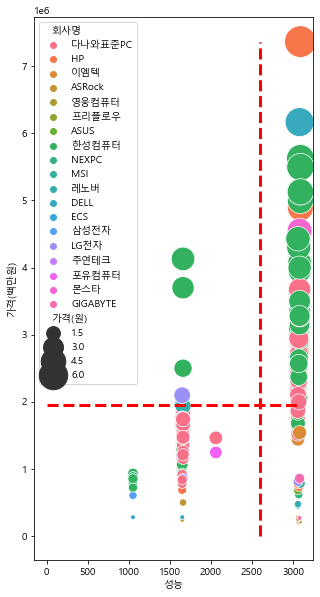

In [9]:
plt.figure(figsize=(5, 10))
sns.scatterplot(x= '성능', y = '가격(원)',
               size = '가격(원)', hue = danawa_data['회사명'],
               data = danawa_data, legend=True,
               sizes = (10,1000))
plt.hlines(price_mean_value, 0, perform_max_value, color = 'red',
          linestyles= 'dashed', linewidth=3)
plt.vlines(perform_mean_value, 0, price_max_value, color = 'red',
          linestyles= 'dashed', linewidth=3)
plt.ylabel('가격(백만원)')
plt.show()